In [102]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.manifold import TSNE,Isomap
from sklearn.decomposition import PCA, SparsePCA, FactorAnalysis
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import time 

In [89]:
# SKlearn MNIST
data = datasets.load_digits()
X = data.data
y = data.target
print(X.shape)
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2,
                                                    random_state=42)

(1797, 64)


In [112]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
n = X_train.shape[1]

print(X_train.shape)
X_train = X_train.flatten().reshape((X_train.shape[0],X_train.shape[1]*X_train.shape[2]))[:10000]
X_test = X_test.flatten().reshape((X_test.shape[0],X_test.shape[1]*X_test.shape[2]))[:10000]
print(X_train.shape)

(60000, 28, 28)
(10000, 784)


In [113]:
def train_model(train_processed, test_processed):
    model = Sequential()
    model.add(Input(shape = (k,)))
    model.add(Dense(50, activation = 'relu'))
    model.add(Dense(100, activation = 'relu'))
    model.add(Dense(200, activation = 'relu'))
    model.add(Dense(400, activation = 'relu'))
    model.add(Dense(X_train.shape[1], activation = 'linear'))
    #model.summary()
    model.compile(optimizer = 'adam',
                  loss = 'mse',
                  metrics = ['mae'])
    callback = EarlyStopping(monitor='val_loss',
                             patience=10,
                             restore_best_weights=True)
    history = model.fit(train_processed,
                        X_train_scaled,
                        epochs = 100,
                        batch_size=16,
                        validation_split = 0.2,
                        callbacks=[callback],
                        verbose = 0)
    mse, mae = model.evaluate(test_processed,X_test_scaled)
    return mse, mae, history, model

In [114]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [115]:
def get_k_dimensional_reduction(k):

    techniques = [{'name': 'PCA',
                   'model': PCA(n_components=k)},
                  {'name': 'PPCA',
                   'model': FactorAnalysis(n_components=k)},
                  {'name': 'TSNE',
                   'model': TSNE(n_components=k, verbose=1, perplexity=40, n_iter=300, method='exact')},
                  {'name': 'SparsePCA',
                    'model': SparsePCA(n_components=k)},
                  {'name': 'Isomap',
                    'model': Isomap(n_components=k)}]
    
    for technique in techniques:
        print(technique['name'])
        start = time.time()
        technique['transformed_train'] = technique['model'].fit_transform(X_train_scaled)
        stop = time.time()
        technique['transform_time'] = stop-start
        technique['transformed_test'] = technique['model'].fit_transform(X_test_scaled)
    for tech in techniques:
        print('Train',tech['name'])
        mse, mae, history, model = train_model(tech['transformed_train'],tech['transformed_test'])
        print('mae',mae)
        tech['mse'] = mse
        tech['mae'] = mae
        tech['history'] = history
        tech['model'] = model
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.show()
    results = pd.DataFrame(techniques)
    results['k'] = k
    return results

PCA
PPCA
TSNE
[t-SNE] Computing pairwise distances...


/Users/margaridacampos/.pyenv/versions/3.11.6/envs/pbd/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 5.642045
[t-SNE] KL divergence after 250 iterations with early exaggeration: 88.548381
[t-SNE] KL divergence after 300 iterations: 2.722421
[t-SNE] Computing pairwise distances...


/Users/margaridacampos/.pyenv/versions/3.11.6/envs/pbd/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 5.560406
[t-SNE] KL divergence after 250 iterations with early exaggeration: 89.038532
[t-SNE] KL divergence after 300 iterations: 2.754512
SparsePCA
Isomap
Train PCA
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step - loss: 0.7070 - mae: 0.3599
mae 0.3685682415962219


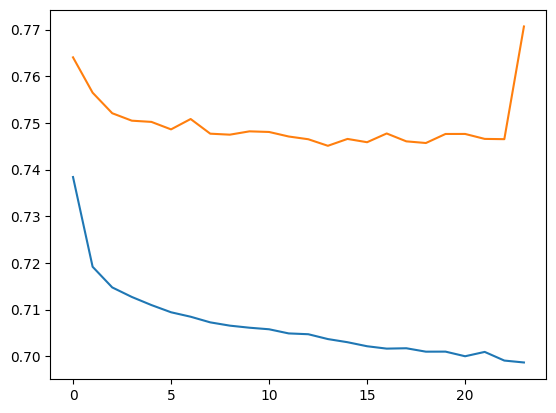

Train PPCA
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step - loss: 0.6998 - mae: 0.3535
mae 0.36249950528144836


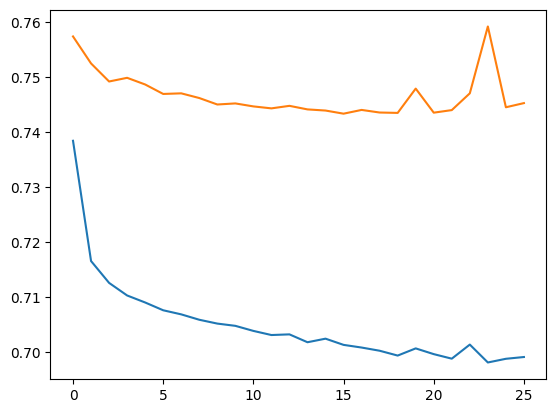

Train TSNE
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step - loss: 0.9006 - mae: 0.4161
mae 0.4202778935432434


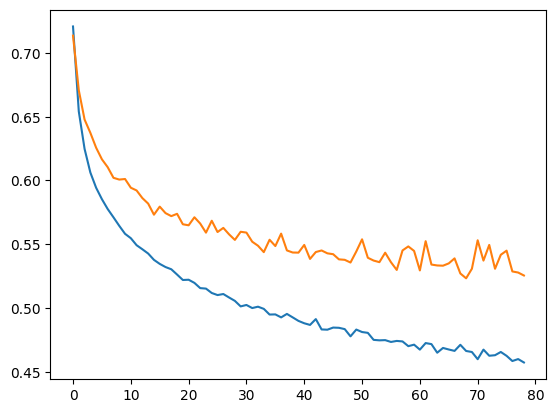

Train SparsePCA
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step - loss: 0.7038 - mae: 0.3556
mae 0.3640315532684326


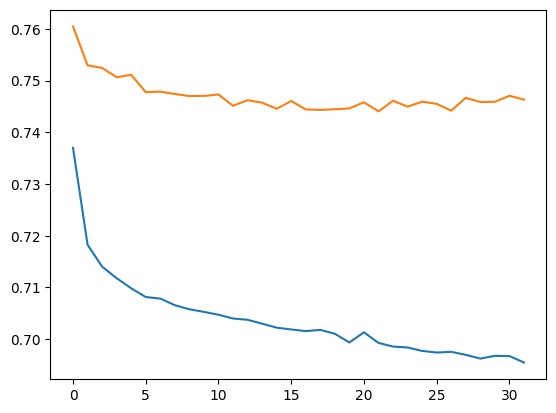

Train Isomap
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step - loss: 1.0036 - mae: 0.4561
mae 0.4666886627674103


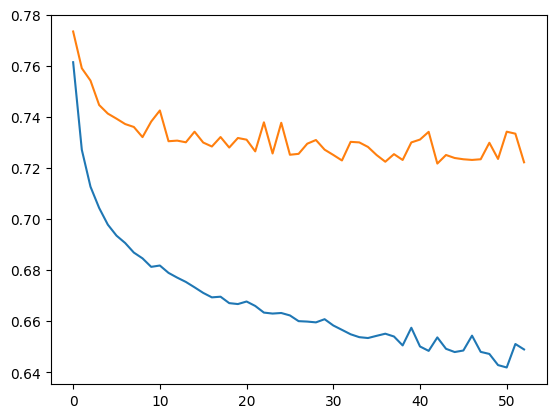

PCA
PPCA
TSNE
[t-SNE] Computing pairwise distances...


/Users/margaridacampos/.pyenv/versions/3.11.6/envs/pbd/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 5.642045
[t-SNE] KL divergence after 250 iterations with early exaggeration: 88.660077
[t-SNE] KL divergence after 300 iterations: 2.077990
[t-SNE] Computing pairwise distances...


/Users/margaridacampos/.pyenv/versions/3.11.6/envs/pbd/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 5.560406
[t-SNE] KL divergence after 250 iterations with early exaggeration: 89.107282
[t-SNE] KL divergence after 300 iterations: 2.193967
SparsePCA
Isomap
Train PCA
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step - loss: 0.6509 - mae: 0.3426
mae 0.346922904253006


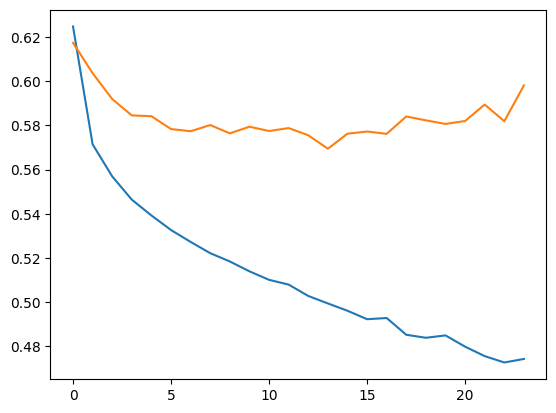

Train PPCA
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - loss: 0.6659 - mae: 0.3467
mae 0.35397928953170776


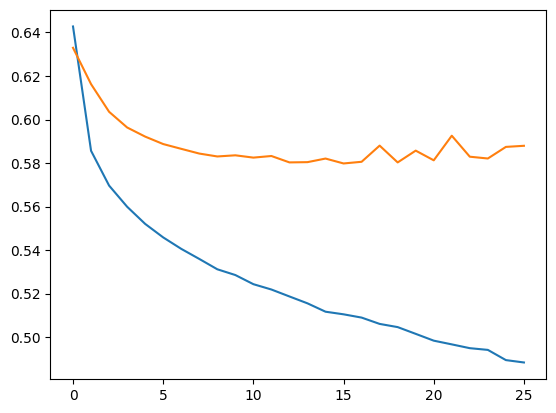

Train TSNE
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step - loss: 0.9792 - mae: 0.4849
mae 0.4882475733757019


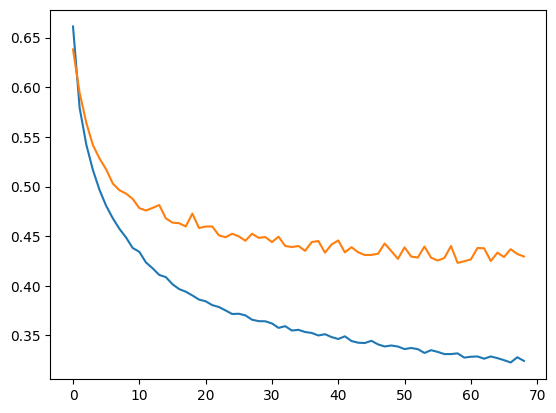

Train SparsePCA
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step - loss: 0.5638 - mae: 0.3042
mae 0.30686548352241516


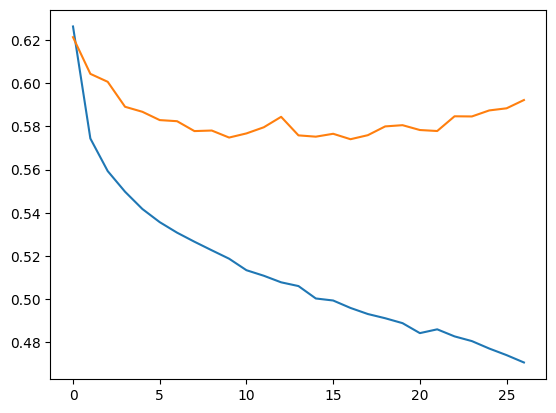

Train Isomap
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step - loss: 1.1836 - mae: 0.5351
mae 0.5435786247253418


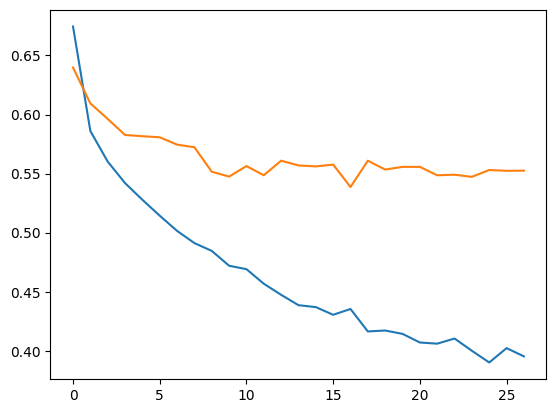

PCA
PPCA
TSNE
[t-SNE] Computing pairwise distances...


/Users/margaridacampos/.pyenv/versions/3.11.6/envs/pbd/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 5.642045
[t-SNE] KL divergence after 250 iterations with early exaggeration: 88.738861
[t-SNE] KL divergence after 300 iterations: 1.844162
[t-SNE] Computing pairwise distances...


/Users/margaridacampos/.pyenv/versions/3.11.6/envs/pbd/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 5.560406
[t-SNE] KL divergence after 250 iterations with early exaggeration: 89.172778
[t-SNE] KL divergence after 300 iterations: 1.977451
SparsePCA
Isomap
Train PCA
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step - loss: 0.7094 - mae: 0.3935
mae 0.40538904070854187


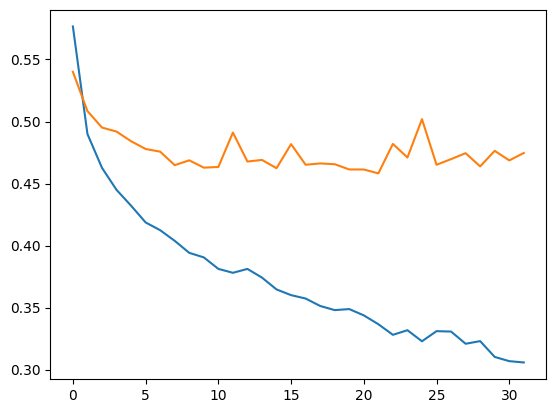

Train PPCA
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step - loss: 0.7666 - mae: 0.4216
mae 0.43117690086364746


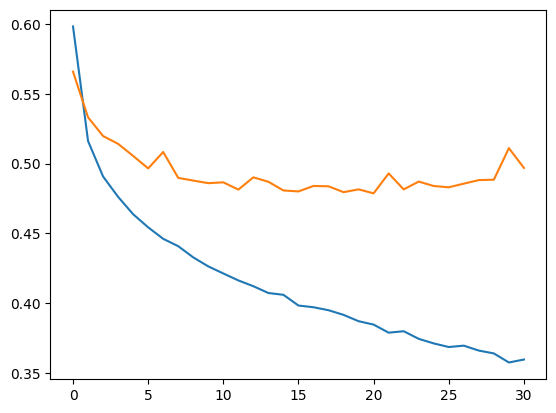

Train TSNE
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step - loss: 0.8621 - mae: 0.4532
mae 0.4604695737361908


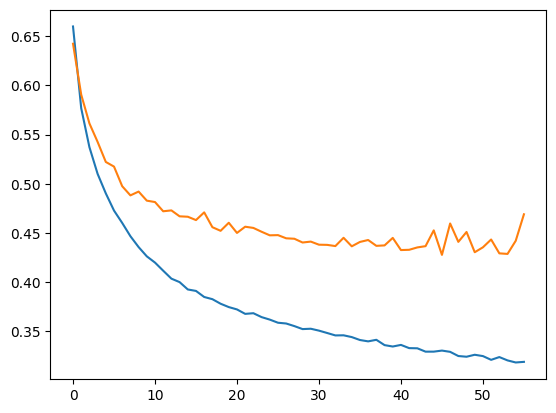

Train SparsePCA
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step - loss: 0.9932 - mae: 0.4938
mae 0.507485032081604


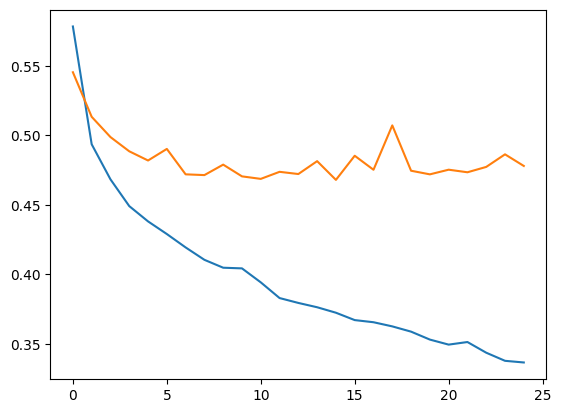

Train Isomap
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step - loss: 1.3854 - mae: 0.5543
mae 0.553086519241333


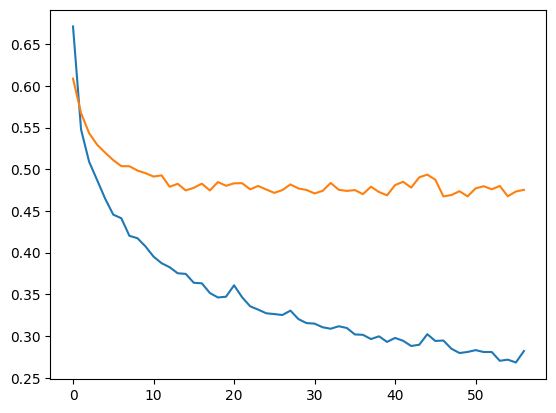

PCA
PPCA
TSNE
[t-SNE] Computing pairwise distances...


/Users/margaridacampos/.pyenv/versions/3.11.6/envs/pbd/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 5.642045
[t-SNE] KL divergence after 250 iterations with early exaggeration: 88.775280
[t-SNE] KL divergence after 300 iterations: 1.771011
[t-SNE] Computing pairwise distances...


/Users/margaridacampos/.pyenv/versions/3.11.6/envs/pbd/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 5.560406
[t-SNE] KL divergence after 250 iterations with early exaggeration: 89.203833
[t-SNE] KL divergence after 300 iterations: 1.923459
SparsePCA
Isomap
Train PCA
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step - loss: 0.8017 - mae: 0.4199
mae 0.4300449788570404


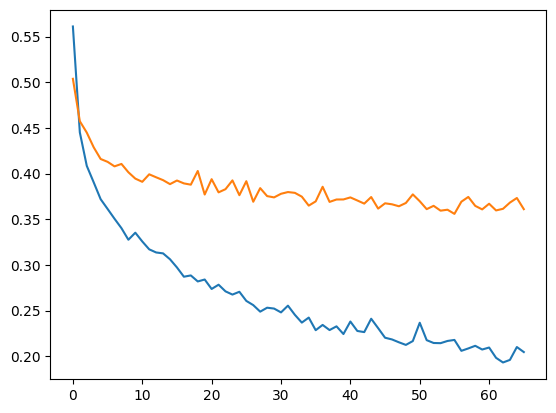

Train PPCA
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step - loss: 0.9405 - mae: 0.4870
mae 0.49274858832359314


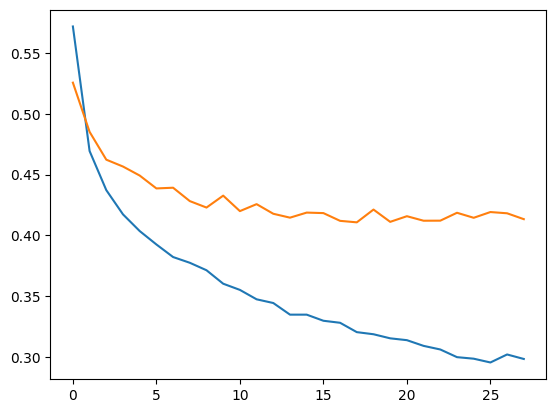

Train TSNE
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step - loss: 0.9263 - mae: 0.4739
mae 0.4826515018939972


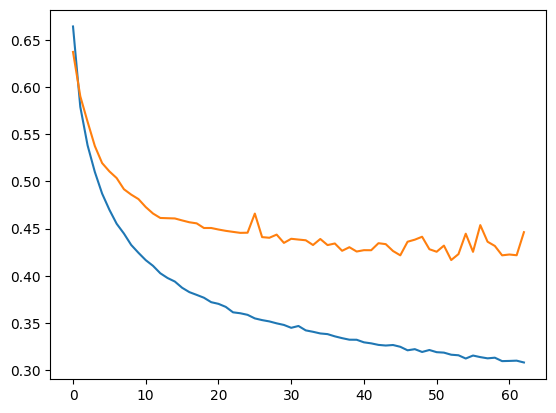

Train SparsePCA
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step - loss: 1.0160 - mae: 0.4905
mae 0.5025762319564819


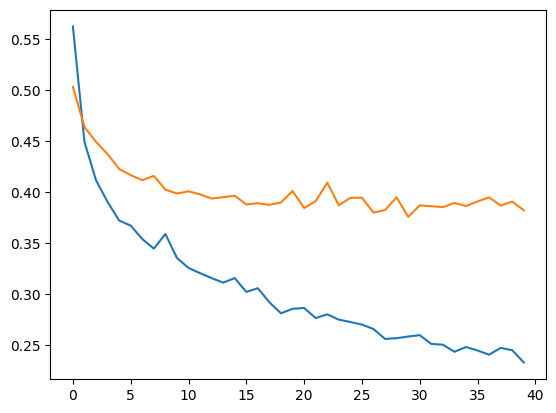

Train Isomap
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step - loss: 0.9487 - mae: 0.4739
mae 0.48363423347473145


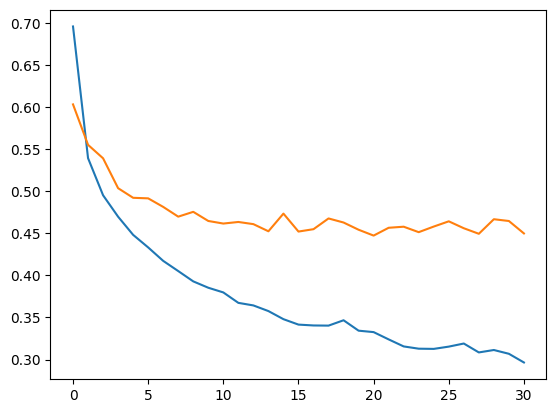

In [116]:
dfs = []
ks = [2, 5, 10, 20]
for k in ks:
    df = get_k_dimensional_reduction(k)
    dfs.append(df)

In [228]:
X_test.shape

(10000, 784)

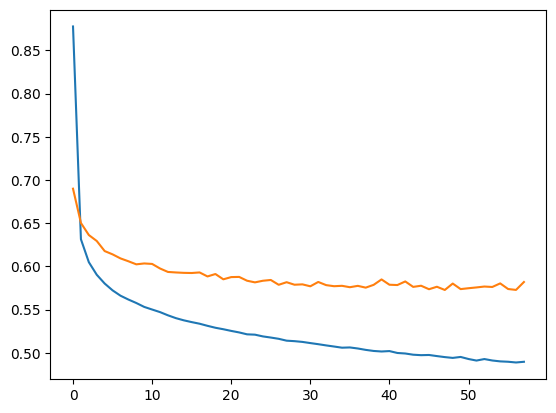

In [64]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [165]:
all_tests = pd.concat(dfs)
results = all_tests[['name','k','transform_time','mse','mae']]
results

,name,k,transform_time,mse,mae
0,PCA,2,0.159652,0.739770,0.368568
1,PPCA,2,10.788295,0.729711,0.362500
2,TSNE,2,397.411825,0.925892,0.420278
3,SparsePCA,2,43.383462,0.735104,0.364032
4,Isomap,2,25.590888,1.044155,0.466689
0,PCA,5,0.118591,0.673739,0.346923
1,PPCA,5,8.595261,0.694859,0.353979
2,TSNE,5,591.971948,0.990908,0.488248
3,SparsePCA,5,78.205830,0.581716,0.306865
4,Isomap,5,25.482481,1.203885,0.543579


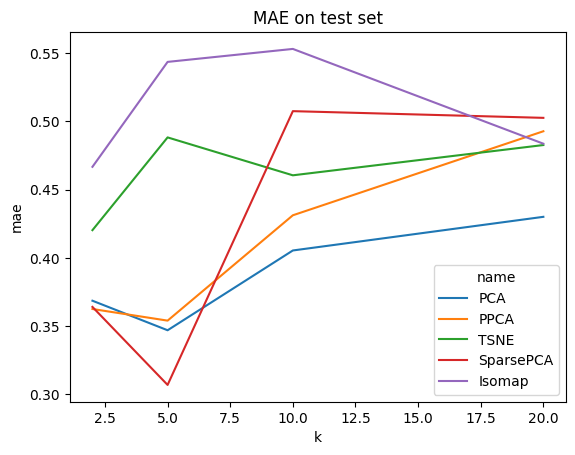

In [232]:
import seaborn as sns

ax = sns.lineplot(data = results, x = 'k', y = 'mae', hue = 'name')
#ax.set_ylim(0,0.6)
ax.set_title('MAE on test set')
#plt.show()
plt.savefig('mae_k.png')

In [172]:
all_tests.columns

Index(['name', 'model', 'transformed_train', 'transform_time',
       'transformed_test', 'mse', 'mae', 'history', 'k'],
      dtype='object')

In [184]:
mae_sample = pd.DataFrame({'label': y_test})
row = all_tests.iloc[0]
for index,row in all_tests.iterrows():
    mae = np.abs(row['model'].predict(row['transformed_test']) - X_test_scaled).mean(axis = 1)
    mae_sample[f'{row["name"]}_{row.k}'] = mae

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step


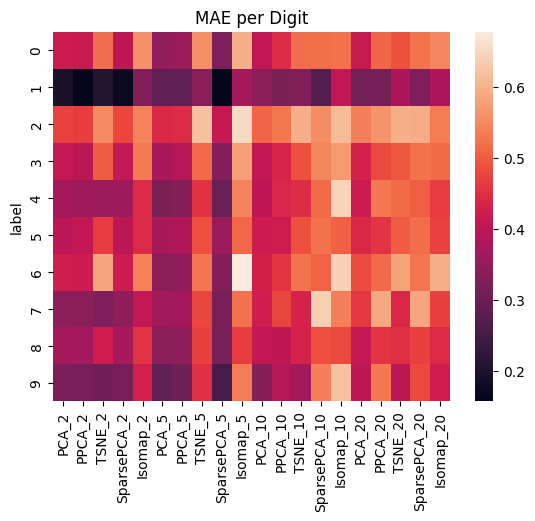

In [230]:
sns.heatmap(mae_sample.groupby('label').mean())
plt.title('MAE per Digit')
#plt.show()
plt.savefig('heatmap_label.png')

In [196]:
all_tests

,name,model,transformed_train,transform_time,transformed_test,mse,mae,history,k
0,PCA,"<Sequential name=sequential_33, built=True>","[[-0.9976579372970655, -4.651823651615585], [8...",0.159652,"[[-5.4583111574202094, 6.414006677623042], [2....",0.739770,0.368568,<keras.src.callbacks.history.History object at...,2
1,PPCA,"<Sequential name=sequential_34, built=True>","[[-0.31121483997003135, -0.7097534352428323], ...",10.788295,"[[-0.786475925354775, 1.0522702861962154], [0....",0.729711,0.362500,<keras.src.callbacks.history.History object at...,2
2,TSNE,"<Sequential name=sequential_35, built=True>","[[2.0081873, 0.44868633], [8.994765, -0.953582...",397.411825,"[[-9.832736, 2.9261794], [-1.7912924, -5.56706...",0.925892,0.420278,<keras.src.callbacks.history.History object at...,2
3,SparsePCA,"<Sequential name=sequential_36, built=True>","[[-2.227208463907324, 4.177659649815724], [6.4...",43.383462,"[[-2.874298299855448, -7.86190781166857], [-0....",0.735104,0.364032,<keras.src.callbacks.history.History object at...,2
4,Isomap,"<Sequential name=sequential_37, built=True>","[[0.04235076015428716, -63.9032065852665], [-7...",25.590888,"[[59.06034342077961, -1.859528198964308], [-2....",1.044155,0.466689,<keras.src.callbacks.history.History object at...,2
0,PCA,"<Sequential name=sequential_38, built=True>","[[-0.9976579372970655, -4.651823651615585, -0....",0.118591,"[[-5.4583111574202094, 6.414006677623042, -4.1...",0.673739,0.346923,<keras.src.callbacks.history.History object at...,5
1,PPCA,"<Sequential name=sequential_39, built=True>","[[-0.2863951578622064, -0.7706033740546747, 0....",8.595261,"[[-0.8465775330266014, 1.045837371948341, -0.5...",0.694859,0.353979,<keras.src.callbacks.history.History object at...,5
2,TSNE,"<Sequential name=sequential_40, built=True>","[[0.28739142, -0.26087773, 0.27084014, 5.47263...",591.971948,"[[-5.793545, 1.7921073, -0.44414014, 1.3228242...",0.990908,0.488248,<keras.src.callbacks.history.History object at...,5
3,SparsePCA,"<Sequential name=sequential_41, built=True>","[[-3.7077476600542987, -1.3393906132442936, -0...",78.205830,"[[-0.3137568427431599, 6.820257175998631, -6.5...",0.581716,0.306865,<keras.src.callbacks.history.History object at...,5
4,Isomap,"<Sequential name=sequential_42, built=True>","[[0.0423507601543426, -63.90320658526669, 9.89...",25.482481,"[[59.060343420779624, -1.8595281989642456, -19...",1.203885,0.543579,<keras.src.callbacks.history.History object at...,5


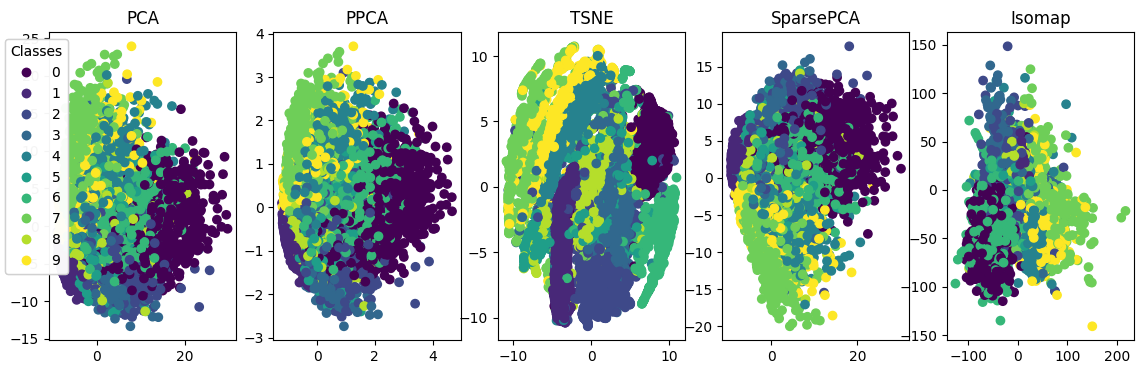

In [227]:
fig, ax = plt.subplots(1,5, figsize = (14,4))
for i in range(5):
    row = all_tests.iloc[i]
    ax[i].set_title(row['name'])
    ax[i].scatter(row.transformed_test[:,0],row.transformed_test[:,1], c = y_test)
    
    # produce a legend with the unique colors from the scatter
legend1 = ax[0].legend(*scatter.legend_elements(),
                    loc="upper right", title="Classes",bbox_to_anchor=(0.14, 1))
ax[0].add_artist(legend1)
plt.savefig('2d_vis.png')

In [ ]:
sns.scatterplot(x = '')

In [137]:
all_tests[(all_tests.name=='PCA') & (all_tests.k==2)]

,name,model,transformed_train,transform_time,transformed_test,mse,mae,history,k
0,PCA,"<Sequential name=sequential_33, built=True>","[[-0.9976579372970655, -4.651823651615585], [8...",0.159652,"[[-5.4583111574202094, 6.414006677623042], [2....",0.73977,0.368568,<keras.src.callbacks.history.History object at...,2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


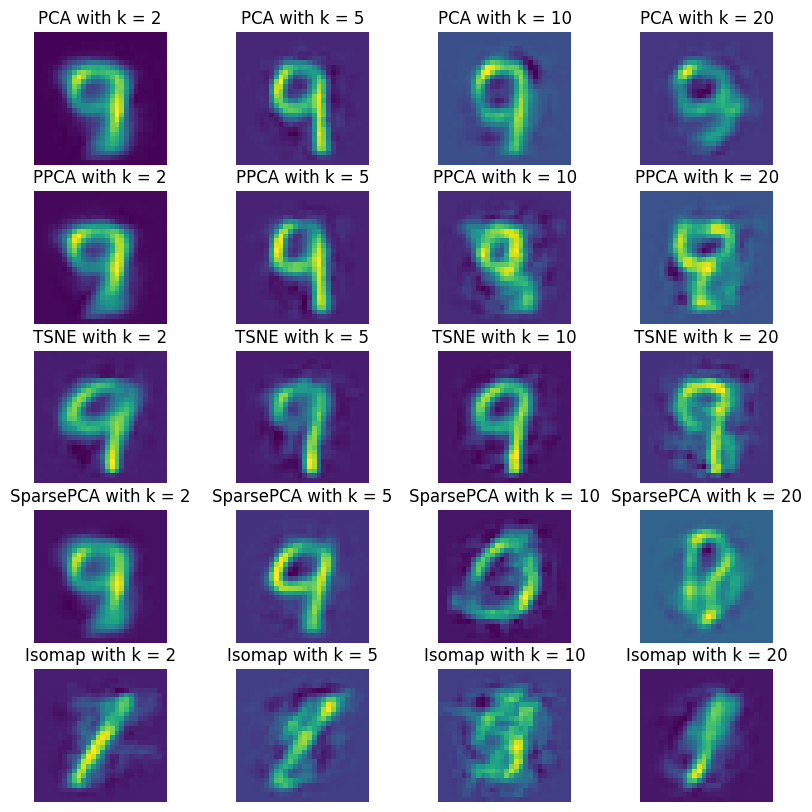

In [155]:
fig, axs = plt.subplots(5,4, figsize = (10,10))
for i,technique in enumerate(all_tests.name.unique()):
    for j,k in enumerate(all_tests.k.unique()):
        row = all_tests[(all_tests.name== technique) & (all_tests.k==k)]
        axs[i,j].set_axis_off()
        axs[i,j].set_title(technique + f' with k = {k}')
        axs[i,j].imshow(scaler.inverse_transform(row['model'].iloc[0].predict(row['transformed_test'].iloc[0][16:17])).reshape((n,n)))
#axs[0].imshow(X_test[0].reshape((n,n)))
#axs[1].imshow(scaler.inverse_transform(model.predict(techniques[3]['transformed_test'][0:1])).reshape((n,n)))
plt.savefig("example_9.png") 

In [149]:
import pickle
with open('all_tests_df.pickle', 'wb') as handle:
    pickle.dump(all_tests, handle, protocol=pickle.HIGHEST_PROTOCOL)